In [1]:
import pandas as pd

# df = pd.read_parquet("data/oxford-iiit-pet/initial_samples.parquet")
df = pd.read_parquet("active_labeled.parquet")
df


,label,filepath
0,cat,data/oxford-iiit-pet/20/00624.jpg
1,cat,data/oxford-iiit-pet/20/00546.jpg
2,cat,data/oxford-iiit-pet/20/02051.jpg
3,cat,data/oxford-iiit-pet/20/00816.jpg
4,cat,data/oxford-iiit-pet/20/02624.jpg
...,...,...
515,dog,data/oxford-iiit-pet/29/01392.jpg
516,dog,data/oxford-iiit-pet/31/02674.jpg
517,dog,data/oxford-iiit-pet/21/00379.jpg
518,dog,data/oxford-iiit-pet/10/01967.jpg


In [2]:
df["label"].value_counts()

label
dog    391
cat    129
Name: count, dtype: int64

In [3]:
from active_vision import ActiveLearner

al = ActiveLearner("resnet18")

2025-01-13 22:49:44.908 | INFO     | active_vision.core:load_model:30 - Loading model resnet18


In [4]:
al.load_dataset(df, filepath_col="filepath", label_col="label", batch_size=64)

2025-01-13 22:49:50.998 | INFO     | active_vision.core:load_dataset:45 - Loading dataset from filepath and label
2025-01-13 22:49:50.998 | INFO     | active_vision.core:load_dataset:48 - Creating dataloaders
2025-01-13 22:49:51.466 | INFO     | active_vision.core:load_dataset:59 - Creating learner
2025-01-13 22:49:51.595 | INFO     | active_vision.core:load_dataset:62 - Done. Ready to train.


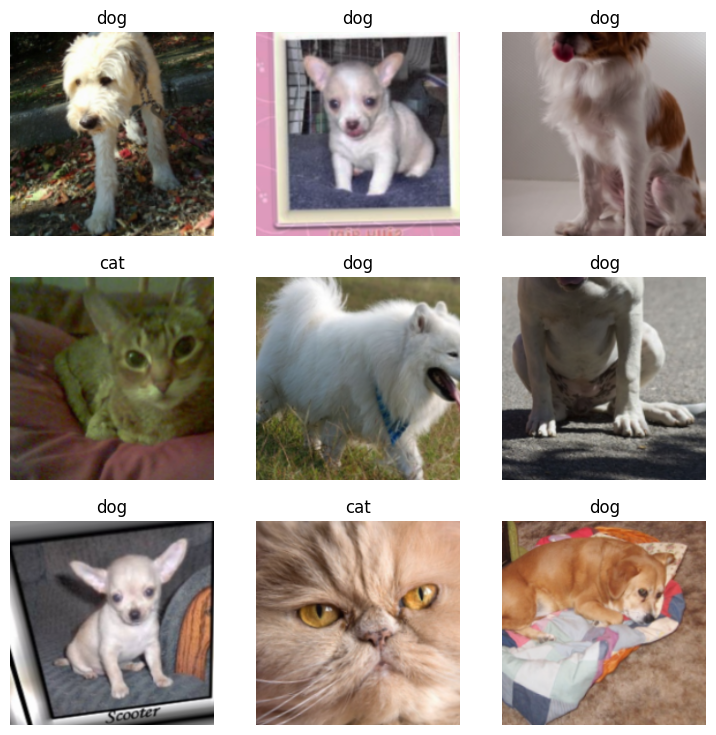

In [5]:
al.show_batch()

In [6]:
al.train_set

,label,filepath
0,cat,data/oxford-iiit-pet/20/00624.jpg
1,cat,data/oxford-iiit-pet/20/00546.jpg
2,cat,data/oxford-iiit-pet/20/02051.jpg
3,cat,data/oxford-iiit-pet/20/00816.jpg
4,cat,data/oxford-iiit-pet/20/02624.jpg
...,...,...
515,dog,data/oxford-iiit-pet/29/01392.jpg
516,dog,data/oxford-iiit-pet/31/02674.jpg
517,dog,data/oxford-iiit-pet/21/00379.jpg
518,dog,data/oxford-iiit-pet/10/01967.jpg


2025-01-13 22:49:54.744 | INFO     | active_vision.core:lr_find:68 - Finding optimal learning rate


2025-01-13 22:50:11.414 | INFO     | active_vision.core:lr_find:70 - Optimal learning rate: 0.0006918309954926372


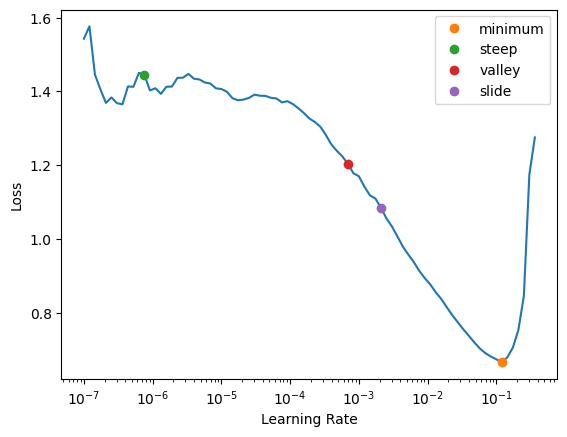

In [7]:
al.lr_find()

2025-01-13 22:50:16.694 | INFO     | active_vision.core:train:73 - Training for 3 epochs with learning rate: 0.005


epoch,train_loss,valid_loss,accuracy,time
0,0.962168,0.488499,0.846154,00:01


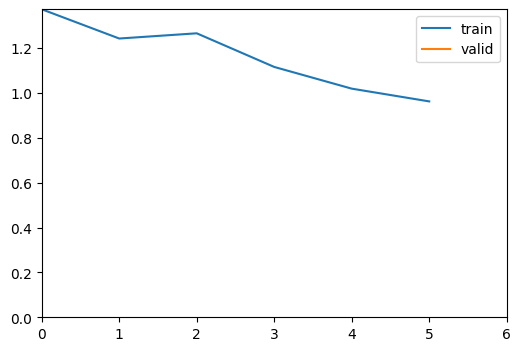

epoch,train_loss,valid_loss,accuracy,time
0,0.371751,0.096673,0.961538,00:02
1,0.254303,0.337353,0.932692,00:01
2,0.188719,0.249436,0.942308,00:01


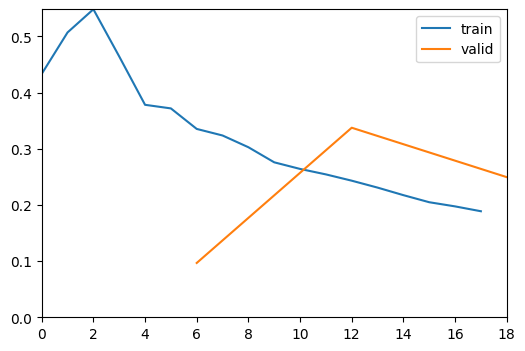

In [8]:
al.train(epochs=3, lr=5e-3)

## Evaluate the model on a *labeled* evaluation set

In [9]:
evaluation_df = pd.read_parquet("data/oxford-iiit-pet/evaluation_samples.parquet")
al.evaluate(evaluation_df, filepath_col="filepath", label_col="label")


2025-01-13 22:50:31.168 | INFO     | active_vision.core:evaluate:115 - Accuracy: 98.28%


0.9828291087489779

## Get the predictions from an *unlabeled* set

In [10]:
df = pd.read_parquet("data/oxford-iiit-pet/unlabeled_samples.parquet")
filepaths = df["filepath"].tolist()
len(filepaths)

3310

In [11]:
pred_df = al.predict(filepaths, batch_size=128)
pred_df

2025-01-13 22:50:33.096 | INFO     | active_vision.core:predict:80 - Running inference on 3310 samples


,filepath,pred_label,pred_conf
0,data/oxford-iiit-pet/20/00000.jpg,cat,0.731059
1,data/oxford-iiit-pet/1/00001.jpg,dog,0.730902
2,data/oxford-iiit-pet/18/00002.jpg,dog,0.731023
3,data/oxford-iiit-pet/3/00005.jpg,dog,0.729869
4,data/oxford-iiit-pet/22/00007.jpg,dog,0.730841
...,...,...,...
3305,data/oxford-iiit-pet/14/03675.jpg,dog,0.730941
3306,data/oxford-iiit-pet/26/03676.jpg,cat,0.731059
3307,data/oxford-iiit-pet/1/03677.jpg,dog,0.727080
3308,data/oxford-iiit-pet/35/03678.jpg,dog,0.731054


In [12]:
uncertain_df = al.sample_uncertain(pred_df, num_samples=30)
uncertain_df

2025-01-13 22:50:36.413 | INFO     | active_vision.core:sample_uncertain:122 - Getting top 30 low confidence samples


,filepath,pred_label,pred_conf
782,data/oxford-iiit-pet/27/00865.jpg,cat,0.513746
2938,data/oxford-iiit-pet/21/03255.jpg,dog,0.520481
869,data/oxford-iiit-pet/34/00961.jpg,cat,0.521471
2258,data/oxford-iiit-pet/10/02491.jpg,dog,0.522688
1999,data/oxford-iiit-pet/31/02202.jpg,cat,0.528890
1822,data/oxford-iiit-pet/17/02006.jpg,cat,0.543565
408,data/oxford-iiit-pet/33/00448.jpg,cat,0.550159
3045,data/oxford-iiit-pet/10/03385.jpg,dog,0.554917
1285,data/oxford-iiit-pet/21/01414.jpg,dog,0.557291
240,data/oxford-iiit-pet/31/00264.jpg,dog,0.557633


## Label the uncertain samples

In [ ]:
al.label(uncertain_df, output_filename="uncertain")

In [ ]:
labeled_df = pd.read_parquet("uncertain.parquet")

labeled_df


In [ ]:
al.add_to_train_set(labeled_df, output_filename="active_labeled")